In [49]:
# Prediction of SBIN stock with help of data over the last 60 days

In [2]:
#importing libraries
import math
import pandas
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [23]:
#Get the stock quote
df = web.DataReader('SBIN.NS', data_source='yahoo',start='2012-01-01', end='2020-12-31' )

In [24]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,163.600006,161.139999,162.899994,162.764999,14464990.0,147.880890
2012-01-03,171.000000,164.300003,164.399994,170.565002,21341020.0,154.967621
2012-01-04,171.389999,167.520004,171.199997,169.604996,22241630.0,154.095413
2012-01-05,171.854996,168.005005,169.600006,169.244995,21344840.0,153.768341
2012-01-06,170.759995,165.804993,167.500000,167.274994,21137420.0,151.978485
...,...,...,...,...,...,...
2020-12-24,268.850006,264.649994,265.000000,266.850006,28585509.0,264.408844
2020-12-28,276.000000,268.000000,268.750000,275.200012,36870242.0,272.682465
2020-12-29,279.899994,274.700012,276.299988,277.899994,45032526.0,275.357758


In [25]:
#Get the no. of rows and col in the data set
df.shape

(2215, 6)

Text(0, 0.5, 'Close Price USD ($)')

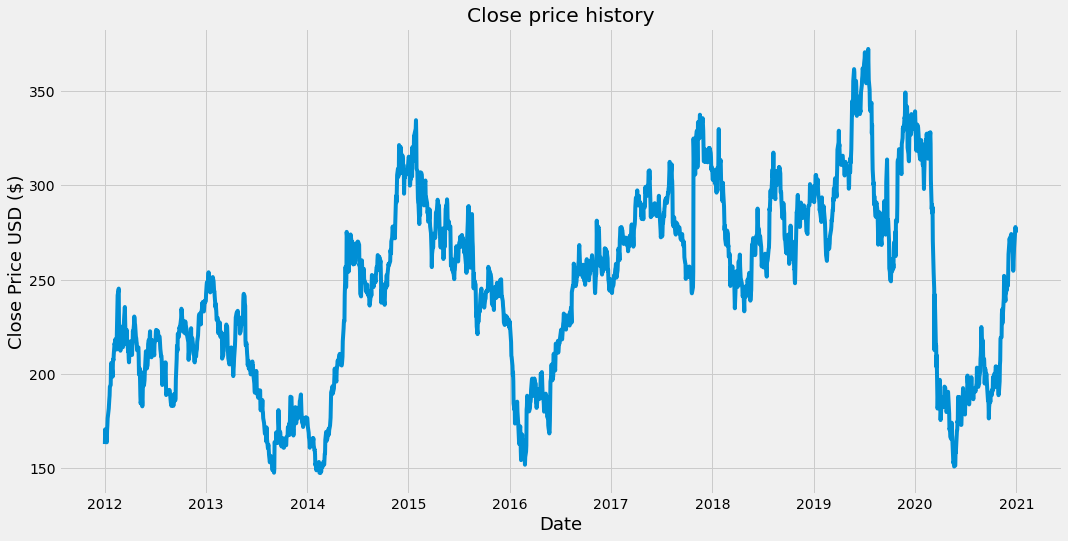

In [26]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)

In [27]:
#Create new dataframe with only the "close" column
data= df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len= math.ceil( len(dataset)* .8)

In [28]:
training_data_len

1772

In [29]:
#Scaling the data for preproccesing 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06845449],
       [0.10311501],
       [0.09884907],
       ...,
       [0.58007464],
       [0.57563099],
       [0.56696594]])

In [31]:
#Create the training data
#Create the scaled training data set
train_data= scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.06845449, 0.10311501, 0.09884907, 0.09724936, 0.08849535,
       0.07272043, 0.10175966, 0.11258002, 0.12922148, 0.13442055,
       0.15232847, 0.16459294, 0.17408018, 0.18250086, 0.20407485,
       0.20747424, 0.25204409, 0.25968719, 0.2519552 , 0.22735956,
       0.2612869 , 0.26841895, 0.26617488, 0.27975028, 0.30619001,
       0.30194632, 0.31289991, 0.31567719, 0.31030041, 0.29134822,
       0.32285372, 0.34529419, 0.38959743, 0.4192366 , 0.43496711,
       0.34722717, 0.34967119, 0.3252755 , 0.28850429, 0.33667349,
       0.34391667, 0.33111892, 0.34353893, 0.3121445 , 0.29961342,
       0.2968139 , 0.33451831, 0.37202277, 0.37944366, 0.39157482,
       0.36691252, 0.33518483, 0.30392377, 0.31716585, 0.33738449,
       0.30527906, 0.30801193, 0.28610468, 0.29130374, 0.26912995])]
[0.2611757716405253]



In [32]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
#Reshape the data
#LSTM data need to be 3D
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1712, 60, 1)

In [34]:
#Build LSTM model
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [35]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [36]:
#Train the model
model.fit(x_train, y_train , batch_size=1, epochs=1)

1712/1712 [==============================] - 22s 12ms/step - loss: 0.0027


In [37]:
#Create the testing dataset
#Create a new array containing scaled values from index 1712 to 2215 
test_data= scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test= []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [38]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [39]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [40]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [41]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test )**2 )
rmse

1.0141506496455277

<ipython-input-42-8c4dddbd1619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


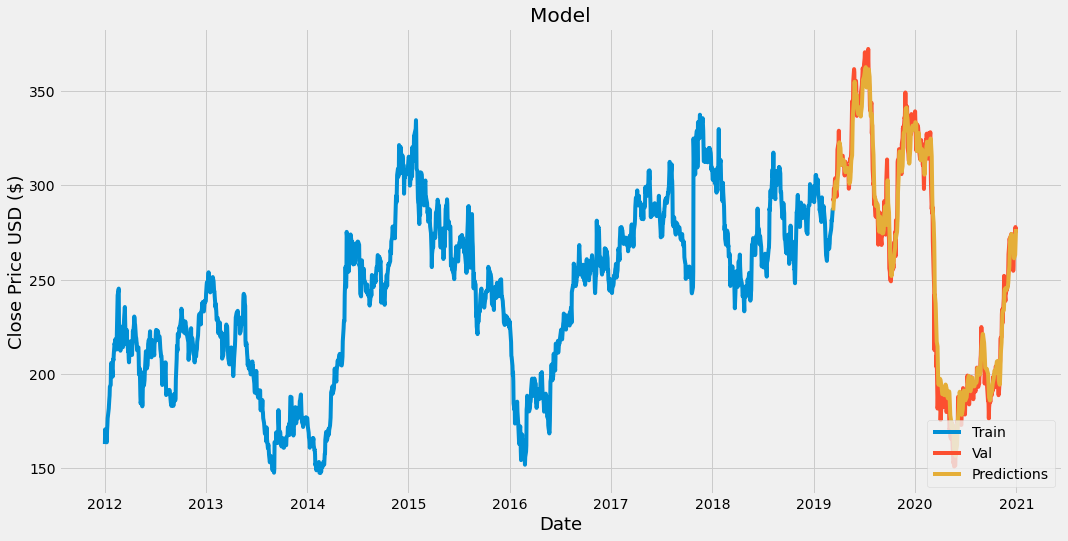

In [42]:
#PLot the data
train= data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [43]:
#Show the valid(actual) and predicted prices
valid


,Close,Predictions
Date,,
2019-03-13,293.149994,286.684692
2019-03-14,291.899994,289.794769
2019-03-15,298.399994,291.675385
2019-03-18,298.950012,294.706268
2019-03-19,303.049988,297.130219
...,...,...
2020-12-24,266.850006,261.299255
2020-12-28,275.200012,263.166595
2020-12-29,277.899994,268.038605


In [47]:
#Get the quote
sbin_quote= web.DataReader('SBIN.NS',data_source='yahoo',start='2012-01-01',end='2020-12-31')
#Create a new dataframe
new_df = sbin_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days= new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled= scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[278.07245]]


In [48]:
#Get the quote
sbin_quote2= web.DataReader('SBIN.NS',data_source='yahoo',start='2012-01-01',end='2021-01-04')
print(sbin_quote2['Close'])

Date
2012-01-02    162.764999
2012-01-03    170.565002
2012-01-04    169.604996
2012-01-05    169.244995
2012-01-06    167.274994
                 ...    
2020-12-29    277.899994
2020-12-30    276.899994
2020-12-31    274.950012
2021-01-01    279.399994
2021-01-04    281.049988
Name: Close, Length: 2217, dtype: float64
